In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import torch
sys.path.append("../src")
from exlib.segmenters.superpixels import Felzenszwalb, Slic, Quickshift, Watershed
from exlib.explainers.common import convert_idx_masks_to_bool
from exlib.utils import hatch_dim_and_outline, plot_masks

In [2]:
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
SEED = 42
if SEED != -1:
    # Torch RNG
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    # Python RNG
    np.random.seed(SEED)
    random.seed(SEED)

cuda


In [3]:
from torchvision import datasets, transforms

ROOT_DATA_PATH = '/shared_data0/chaenyk/dataset/imagenet'

train_dir = os.path.join(ROOT_DATA_PATH, 'train')
val_dir = os.path.join(ROOT_DATA_PATH, 'val')
json_file = os.path.join(ROOT_DATA_PATH, 'imagenet_class_index.json')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = datasets.ImageFolder(train_dir, transform)
val_dataset = datasets.ImageFolder(val_dir, transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, shuffle=False)

In [4]:
idx = 0
image, label = next(iter(test_loader))
image.shape, label.shape

(torch.Size([2, 3, 224, 224]), torch.Size([2]))

# Superpixels

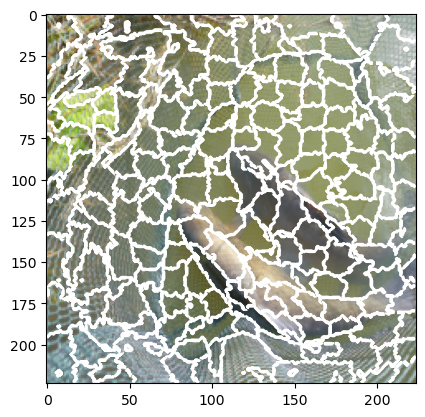

In [5]:
# watershed
watershed_segmenter = Watershed()
watershed_segments = watershed_segmenter(image)
watershed_masks_bool = convert_idx_masks_to_bool(watershed_segments[0])
plot_masks(image[0].permute(1,2,0), watershed_masks_bool)

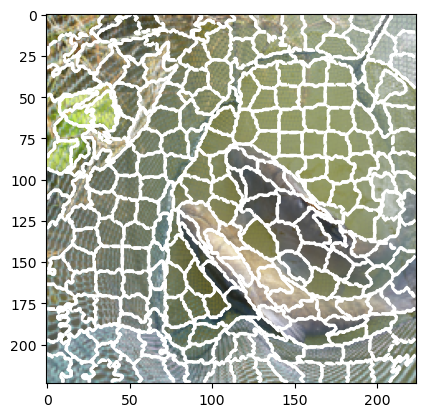

In [6]:
# slic
slic_segmenter = Slic()
slic_segments = slic_segmenter(image)
slic_masks_bool = convert_idx_masks_to_bool(slic_segments[0])
plot_masks(image[0].permute(1,2,0), slic_masks_bool)

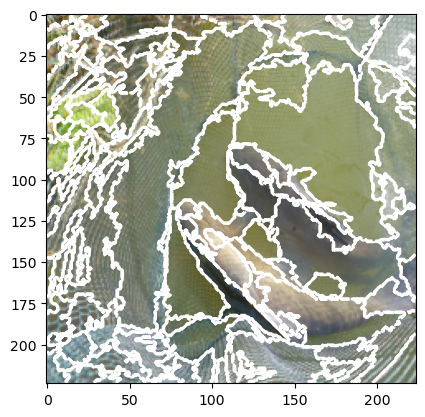

In [7]:
# felzenszwalb
felzenszwalb_segmenter = Felzenszwalb()
felzenszwalb_segments = felzenszwalb_segmenter(image)
felzenszwalb_masks_bool = convert_idx_masks_to_bool(felzenszwalb_segments[0])
plot_masks(image[0].permute(1,2,0), felzenszwalb_masks_bool)

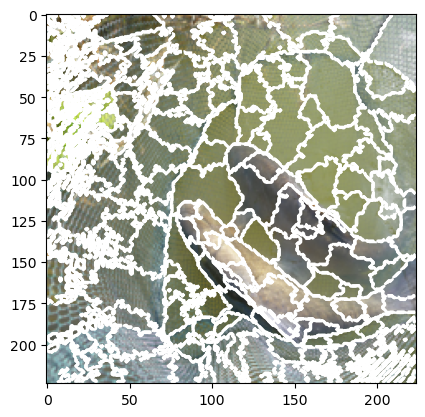

In [8]:
# quickshift
quickshift_segmenter = Quickshift()
quickshift_segments = quickshift_segmenter(image)
quickshift_masks_bool = convert_idx_masks_to_bool(quickshift_segments[0])
plot_masks(image[0].permute(1,2,0), quickshift_masks_bool)

# Patch Segmenter

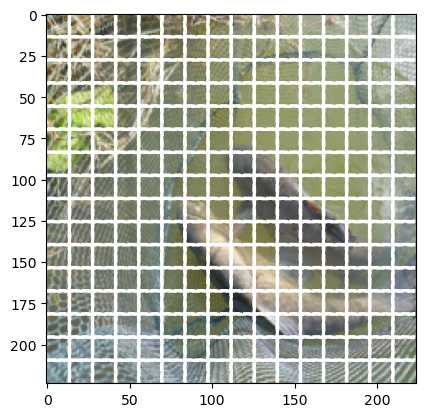

In [9]:
from exlib.segmenters.patcher import PatchSegmenter

# quickshift
patch_segmenter = PatchSegmenter()
patch_segments = patch_segmenter(image)
patch_masks_bool = convert_idx_masks_to_bool(patch_segments[0])
plot_masks(image[0].permute(1,2,0), patch_masks_bool)